
<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Introduction</h4>


his case study is the ***[Capstone Project](https://www.coursera.org/learn/google-data-analytics-capstone)*** of ***[Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics)*** . In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago. 

Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand **how casual riders and annual members use Cyclistic bikes differently**. From the insights, our team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve our recommendations, so they must be backed up with **compelling data insights and professional data visualizations**.

There are  3 pricing plans: single-ride passes, full-day passes, and annual memberships. **Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members**.

In order to answer the key business questions, I followed the steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act**.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Ask</h4>

>* **How do Annual members and Casual riders use Cyclistic bikes differently?**

>* The key stakeholders are:
     >  1. **Lily Moreno**, the director of marketing and my manager.
     >  2. **Cyclistic executive team**.

* **First the Cyclistic executive team must approve our recommendations, so they must be backed up with data insights and data visualizations.**

* **Then from the insights of my analysis, my team will design a new marketing strategy to convert casual riders into annual members.**

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Prepare</h4>

* The **previous 12 months** data from **2020 April 1 to 2021 March 30** is used for analysis.

* The data is stored in **CSV** files. Each file contains **one month data**. Thus a total of **12** .csv files.

* The data is **structured data** ie., Organised data.

* The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are **appropriate**. 

* The data has been made available by **Motivate International Inc.** under this ***[license](https://www.divvybikes.com/data-license-agreement)***. 

* As this data is collected by a real bike sharing company in Chicago, there are no issues with **bias** or **credibility**. So its **Reliable**, **Original**, **Current** and **Cited** (as in ROCCC). I do not think its **Comprehensive** because this data lacks some information.

* As of data Integrity, its **Accurate**, **Consistent** and **Trustworthy**.

> **Limitations**

* The **data-privacy issues prohibit me from using riders’ personally identifiable information**. This means that I won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

* The **financial information** such as each Ride Id ticket fare is not available.

* If the personally identifiable information and financial information were available, I could have calculated whether the casual riders had spent more money than if they opt for taking annual memberships.

* This data does not contain data about the use of reclining bikes, hand tricycles and cargo bikes. It is said that about 8% of total riders use assistive options.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Process</h4>

In [69]:
#Import Necessary Python Libraries
!pip install cufflinks

import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [70]:
import os


# Specify the path to the folder containing the CSV files
folder_path = r'C:\Users\deeps\Downloads\Cyclistic Bike Sharing'

# Initialize an empty list to store the monthly dataframes
monthly_dataframes = []

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path)
        
        # Append the dataframe to the list
        monthly_dataframes.append(df)

# Concatenate all the monthly dataframes into a single dataframe
data = pd.concat(monthly_dataframes)

# Print the final dataframe
data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


In [72]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Cleaning Process</h4>

In [73]:
#Deleting Columns which are not relevant for my analysis
data = data.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual


In [74]:
# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

data['started_at'] = data['started_at'].astype('datetime64')
data['ended_at'] = data['ended_at'].astype('datetime64')

In [75]:
# Creating the 'ride_length' column and calculating the time difference in minutes
data['ride_length'] = (data['ended_at'] - data['started_at']) / pd.Timedelta(minutes=1)

# Changing the datatype of the 'ride_length' column to int32
data['ride_length'] = data['ride_length'].astype('int32')

# Checking the first few rows of the updated DataFrame
data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,52


In [76]:
data.sort_values(by ='ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
61163,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,member,-29049
26808,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,member,-29034
25965,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,member,-29014
87858,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,member,-29010
90888,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,member,-29004
...,...,...,...,...,...,...
273011,6F7C2DA80561D60C,docked_bike,2020-09-06 23:20:29,2020-10-12 11:46:25,casual,51145
32054,610943B07C04C09A,docked_bike,2020-04-04 23:10:33,2020-05-12 13:35:00,member,54144
236102,F6A59D72627F2711,docked_bike,2020-09-02 18:34:33,2020-10-10 11:17:54,casual,54283
83799,F423D1055877936F,docked_bike,2020-04-03 16:33:09,2020-05-12 08:37:02,casual,55683


In [77]:
# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.

data[data['ride_length'] < 0].count()

# Number of rows containing Negative Values.

ride_id          1229
rideable_type    1229
started_at       1229
ended_at         1229
member_casual    1229
ride_length      1229
dtype: int64

In [78]:
#Number of rows containing "ride length" less than "1" minute
data[data['ride_length'] < 1].count()

ride_id          60316
rideable_type    60316
started_at       60316
ended_at         60316
member_casual    60316
ride_length      60316
dtype: int64

In [79]:
data = data[data['ride_length'] >= 1]
data = data.reset_index()
data = data.drop(columns=['index'])

# Removing 60316 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

data

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,52
...,...,...,...,...,...,...
3429427,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,casual,143
3429428,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,member,8
3429429,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,member,41
3429430,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,member,6


<Axes: xlabel='member_casual', ylabel='ride_length'>

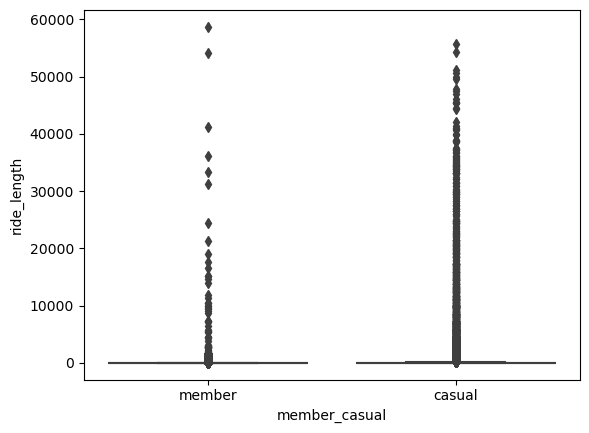

In [80]:
sns.boxplot(data = data, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

# Boxplot of column "Ride Length" to see the distribution of data between Member and Casual Rider.


In [81]:
data = data.astype({'ride_id':'string', 'rideable_type':'category', 'member_casual':'category'})

# Coverting datatypes of each columns.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429432 entries, 0 to 3429431
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   ride_length    int32         
dtypes: category(2), datetime64[ns](2), int32(1), string(1)
memory usage: 98.1 MB


In [82]:
data.shape

# Number of Rows and Columns.

(3429432, 6)

In [83]:
data.isna().sum()

# Checking if Dataframe "df" contains any missing values.

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_length      0
dtype: int64

In [84]:
data['ride_id'] = data['ride_id'].str.strip()

# Removing leading and trailing whitespaces in column "Ride Id".

data[data['ride_id'].duplicated()]

# View any duplicate rows.

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length


<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Analyze and Share </h4>

In [85]:
data['year'] = data['started_at'].dt.year

order = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March']
data['month'] = data['started_at'].dt.month_name()
data['month'] = data['month'].astype(CategoricalDtype(categories=order, ordered=False))

order2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data['day_of_week'] = data['started_at'].dt.day_name()
data['day_of_week'] = data['day_of_week'].astype(CategoricalDtype(categories=order2, ordered=False))

data['hour'] = data['started_at'].dt.hour

data = data.astype({'year':'int16', 'hour':'int8'})

# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.

data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,year,month,day_of_week,hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26,2020,April,Sunday,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8,2020,April,Friday,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14,2020,April,Wednesday,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member,12,2020,April,Tuesday,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual,52,2020,April,Saturday,10


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429432 entries, 0 to 3429431
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
 5   ride_length    int32         
 6   year           int16         
 7   month          category      
 8   day_of_week    category      
 9   hour           int8          
dtypes: category(4), datetime64[ns](2), int16(1), int32(1), int8(1), string(1)
memory usage: 114.5 MB


#  **Analyzing the Difference in No.of Rides Between Casual Riders and Members**

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Total Number of Rides in 1 Year </h4>

In [87]:
pd.pivot_table(data,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,1410173
member,2019259
Total Count,3429432


In [88]:
fig_1 = data.groupby('member_casual', as_index=False).count()

px.bar(fig_1, y = 'member_casual', x = 'ride_id', range_x = [0,3000000],
        color = 'member_casual', 
        height = 300,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

**Key insights** 

**Massive User Base** 

With a total count of over 3 million rides, our bike sharing service has established a substantial user base. This represents a tremendous opportunity for marketing initiatives and further growth.

**Membership Dominance** 

The data clearly shows that the number of member riders surpasses casual riders by a significant margin. This indicates that our bike sharing service has a strong and loyal base of registered members.



<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Number of Rides in Each Month </h4>

In [89]:
data_pv1 = pd.pivot_table(data,
              index = ['year', 'month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
data_pv1 = data_pv1.loc[(data_pv1 != 0).any(axis=1)]
data_pv1

count
                                     ride_id
year        month     member_casual         
2020        April     casual           23466
                      member           60292
            May       casual           86216
                      member          111615
            June      casual          153319
                      member          185249
            July      casual          266691
                      member          276654
            August    casual          284375
                      member          325065
            September casual          226835
                      member          295491
            October   casual          141922
                      member          237996
            November  casual           86730
                      member          168432
            December  casual           29665
                      member           99832
2021        January   casual           17842
                      member           77573
            February  casual            9964
                      member           38685
            March     casual           83148
                      member          142375
Total Count                          3429432

In [90]:
fig_2 = data.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (April 2020 - March 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

Our analysis reveals a clear seasonal trend in bike sharing usage, with the summer season experiencing the highest ridership and the winter months showing a decrease in usage. During the summer, we observe a significant surge in the number of riders utilizing our bikes, reflecting the popularity and increased demand for bike sharing in warm weather.

This insight highlights the importance of aligning our strategies with seasonal fluctuations. By capitalizing on the peak demand during the summer season, we can optimize resource allocation, enhance customer satisfaction, and drive user engagement.

It is equally crucial to consider the decrease in usage during the winter months. While the demand may be lower during colder periods, strategically managing our operational logistics, ensuring bike availability, and implementing targeted marketing efforts can help maintain a consistent level of service and attract riders even during these less active periods.

 <h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Average Number of Rides in Each Weekday </h4>

In [91]:
pd.pivot_table(data,
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
day_of_week member_casual         
Sunday      casual          259667
            member          260720
Monday      casual          149134
            member          263226
Tuesday     casual          143307
            member          279915
Wednesday   casual          156293
            member          300426
Thursday    casual          164217
            member          295923
Friday      casual          205877
            member          301624
Saturday    casual          331678
            member          317425
Total Count                3429432

In [92]:
fig_3 = data.groupby(['day_of_week', 'member_casual'], as_index=False).count()

px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

**Member Ridership** 
    
It is evident that member riders consistently contribute a higher number of rides compared to casual riders throughout the week. This underscores the loyalty and engagement of our registered members, highlighting the value of our membership program.

**Weekend Peak** 

Saturdays and Sundays emerge as the days with the highest total ride counts. This suggests that bike sharing is particularly popular over the weekends, indicating a preference for leisure and recreational activities during this time.

**Weekday Usage**

In contrast, weekday ride counts (Monday to Friday) are generally lower than weekends. However, it is important to note that weekday usage remains consistent. This implies that bike sharing during weekdays primarily serves specific commuting or essential travel needs, showcasing the reliability and consistency of our service for daily commuters.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Average Number of Rides in Each Hour </h4>

In [93]:
pd.pivot_table(data,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           22235
            member           11903
1           casual           13884
            member            6687
2           casual            7613
            member            3599
3           casual            4083
            member            2277
4           casual            3417
            member            3531
5           casual            5365
            member           17062
6           casual           12786
            member           55700
7           casual           22940
            member           93386
8           casual           31445
            member          101285
9           casual           40063
            member           85741
10          casual           57325
            member           91057
11          casual           79346
            member          114087
12          casual           96687
            member          134056
13          casual          105446
            member          133545
14          casual          111802
            member          133666
15          casual          118111
            member          148383
16          casual          124871
            member          177199
17          casual          138598
            member          212189
18          casual          124943
            member          184039
19          casual           95432
            member          128171
20          casual           67129
            member           78673
21          casual           48466
            member           47189
22          casual           43330
            member           33207
23          casual           34856
            member           22627
Total Count                3429432

In [94]:
fig_4 = data.groupby(['hour', 'member_casual'], as_index=False).count()

fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,300000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()

Our analysis reveals valuable insights about the peak hours and overnight usage patterns

**Peak Hours**

We observe that ride counts are higher during specific hours of the day, particularly from 7-10 am and 4-7 pm. This suggests that bike-sharing usage is more prevalent during commuting hours when individuals are traveling to and from work or other daily commitments.

**Overnight Usage** 

Ride counts decrease during late-night and early morning hours (hours 0-6). This indicates lower bike-sharing activity during those times, potentially due to reduced demand or the availability of alternative transportation options during those hours.

**Usage Patterns between 9 PM and 5 AM**

Notably, we observe that between 9 PM  and 5 AM , casual riders utilize the service more. This suggests a preference for evening and late-night recreational activities among casual riders.

 # **Analyzing Difference in Average Ride Length Between Casual riders and Members**.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Average Ride Length in 1 Year </h4>

In [95]:
pd.pivot_table(data,
               index = 'member_casual',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

,mean
,ride_length
member_casual,
casual,45.014347
member,15.879930
Total Ride Average,27.859922


In [96]:
fig_4 = round(data.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,50],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

Casual riders have a mean ride time that is approximately three times as long as that of member riders. With a **mean ride time of approximately 45.014 minutes for casual riders and approximately 15.879 minutes for member riders**, this substantial difference highlights distinct ride duration patterns between the two rider categories. Casual riders tend to utilize the bike-sharing service for much longer, leisurely rides, potentially for recreational purposes or extended trips. In contrast, member riders predominantly take shorter rides, likely for commuting or practical transportation needs. This discrepancy in ride time suggests significant variations in usage preferences and trip purposes between casual and member riders.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Average Ride Length in Each Month </h4>

In [97]:
pd.pivot_table(data,
               index = ['year', 'month', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                           ride_length
year               month     member_casual            
2020               April     casual          73.078923
                             member          21.275194
                   May       casual          51.097580
                             member          19.566546
                   June      casual          51.587448
                             member          18.512931
                   July      casual          59.903829
                             member          17.549911
                   August    casual          45.108687
                             member          16.640198
                   September casual          38.268014
                             member          15.319813
                   October   casual          30.314469
                             member          13.800984
                   November  casual          31.756532
                             member          13.294522
                   December  casual          26.653733
                             member          12.421138
2021               January   casual          25.582222
                             member          12.565016
                   February  casual          49.699117
                             member          17.898255
                   March     casual          38.069527
                             member          13.677619
Total Ride Average                           27.859922

In [98]:
# Perform data transformation and drop NaN values
fig_5 = data.groupby(['year', 'month', 'member_casual'], as_index=False).mean().round(2).dropna()

# Generate the bar chart using Plotly Express
fig = px.bar(fig_5, x='month', y='ride_length', color='member_casual',
             barmode='group', text='ride_length',
             labels={'ride_length': 'Average Ride Length (minutes)',
                     'member_casual': 'Member/Casual',
                     'month': 'Months (April 2020 - March 2021)'},
             hover_name='member_casual', hover_data={'member_casual': False, 'ride_length': True},
             color_discrete_map={'casual': '#FF934F', 'member': '#058ED9'})

# Display the chart
fig.show()

The variation in mean ride length across different months can be influenced by several factors:

**Seasonal Factors**

Seasonal changes, such as weather conditions, daylight hours, or holidays, can impact ride durations. During months with more favorable weather or vacation periods, casual riders may be more inclined to take longer rides for recreational purposes, resulting in increased mean ride lengths. Conversely, in colder or less active months, ride durations may decrease.

**Trip Purposes**

Member riders often use the bike-sharing service for regular commuting or shorter trips related to daily routines. These rides tend to be more practical and purpose-driven, resulting in shorter mean ride lengths. On the other hand, casual riders may be more inclined to use the service for leisurely activities, sightseeing, or longer recreational trips, leading to longer mean ride lengths.

**User Behavior**

Casual riders may have different usage patterns compared to member riders. They may be less constrained by time or have more flexibility in their schedules, allowing them to take longer rides. In contrast, member riders, who are registered users, may prefer shorter, more frequent rides to fulfill their specific transportation needs efficiently.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Average Ride Length in each WeekDay </h4>

In [99]:
pd.pivot_table(data,
               index = ['day_of_week', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
day_of_week        member_casual            
Sunday             casual          50.756877
                   member          18.039805
Monday             casual          45.094271
                   member          15.079844
Tuesday            casual          40.545396
                   member          14.873805
Wednesday          casual          40.361552
                   member          15.057019
Thursday           casual          43.043631
                   member          14.945307
Friday             casual          42.827518
                   member          15.555108
Saturday           casual          46.939134
                   member          17.615412
Total Ride Average                 27.859922

In [100]:
fig_6 = round(data.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

There is a clear pattern in ride length variation between casual riders and members based on weekdays and weekends. Casual riders exhibit a notable increase in ride length during weekends, indicating a preference for longer recreational or leisurely rides. In contrast, member riders maintain consistent ride lengths across weekdays, with a slight uptick observed during weekends.

This suggests that casual riders utilize the bike-sharing service for extended rides during weekends, while members maintain a steady ride length throughout the week, with a slight inclination towards longer rides on weekends. These observations highlight the different usage patterns and preferences between casual riders and members based on the day of the week.

<h4 style="background-color:#ADD8E6;color:white;border-radius: 8px; padding:12px">Analyzing Difference in Rideable Type Usage Between Casual riders and Members </h4>

In [101]:
pd.pivot_table(data,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual           70197
              member          245911
docked_bike   casual         1104212
              member         1411963
electric_bike casual          235764
              member          361385
Total Rides                  3429432

In [102]:
fig_7 = data.groupby(['rideable_type', 'member_casual'], as_index=False).count()

px.bar(fig_7, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual', 'rideable_type' : 'Rideable Type'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

Docked bikes emerge as the most popular rideable type, with a substantial total ride count of 2,516,175 rides. This indicates a high level of demand and usage for docked bikes among both member and casual riders. The convenience and accessibility of docked bikes, with their fixed stations, make them a preferred choice for riders seeking short-distance trips or point-to-point transportation.

Member riders often utilize the service for their regular commuting needs and shorter trips, reflecting a practical and efficient approach to transportation.

On the other hand, casual riders exhibit varying usage patterns based on the rideable types. They contribute a considerable number of rides for docked bikes, demonstrating their preference for convenient and on-demand transportation within the bike-sharing network. Casual riders also show interest in exploring other rideable types such as classic bikes and electric bikes, indicating a desire for leisurely or more efficient ride options.